In [2]:
from world import World 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import itertools as it

In [5]:
d_c_world = World(agent=["chaos","dummy"], seed=[1,2])
d_c_world.create_agents()
d_c_world.run()
agents = d_c_world.get_agents()
errors = d_c_world.get_errors()
preds = d_c_world.get_pred()
priors = d_c_world.get_priors()
time = [t for t in range(len(errors[0]))]

Exception: No valid agents could be found

In [ ]:
plt.plot(time, errors[0], 'r', label=agents[0])
plt.ylim([0, 1])
plt.legend()
plt.title("Agent of Chaos Predicting a Dummy")
plt.show()

In [ ]:
d_a_world = World(agent=["average","dummy"], seed=[3,12], betas=[0.5,0.5])
d_a_world.create_agents()
d_a_world.run()
agents = d_a_world.get_agents()
errors = d_a_world.get_errors()
preds = d_a_world.get_pred()
priors = d_a_world.get_priors()
time = [t for t in range(len(errors[0]))]

In [ ]:
plt.plot(time, errors[0], 'g', label=agents[0])
plt.ylim([0, 1])
plt.legend()
plt.title("Averaging Agent Predicting a Dummy")
plt.show()

## Pairing an averaging agent with a not-so-chaotic counterpart
Instead of a dummy who has constant behavior, we can set a chaotic agent that has constant priors, but will still draw from the priors to generate variable behavior (within the bounds of those priors). The averaging agent should be able to approximate the priors, but not as easily as when the behavior was fixed.

In [ ]:
c_a_world = World(agent=["average","chaos"], alphas=[0.5,0], betas=[0.5,0.2], seed=[17,115])
c_a_world.create_agents()
c_a_world.run()
agents = c_a_world.get_agents()
errors = c_a_world.get_errors()
preds = c_a_world.get_pred()
priors = c_a_world.get_priors()
time = [t for t in range(len(errors[0]))]
#c_a_world.print_results()

In [ ]:
plt.plot(time, errors[0], 'g', label=agents[0])
plt.plot(time, errors[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Averaging Agent + semi-dummy")
plt.show()

## Two Average Joes
We can have two averaging agents try to infer the other's priors.

In [ ]:
a_a_world = World(agent=["average","average"], alphas=[0.5,0.5], betas=[0.2,0.2], seed=[17,150])
a_a_world.create_agents()
a_a_world.run()
agents = a_a_world.get_agents()
errors = a_a_world.get_errors()
preds = a_a_world.get_pred()
priors = a_a_world.get_priors()
time = [t for t in range(len(errors[0]))]
#c_a_world.print_results()

In [ ]:
plt.plot(time, errors[0], 'g', label=agents[0])
plt.plot(time, errors[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Averaging Agent x2")
plt.show()

## Reducing Chaos
It still looks a bit messy - what if we reduce the alphas (conformity adjustments)?

In [ ]:
a_a_world = World(agent=["average","average"], alphas=[0.1,0.1], betas=[0.2, 0.2], seed=[17,150])
a_a_world.create_agents()
a_a_world.run()
agents = a_a_world.get_agents()
errors = a_a_world.get_errors()
preds = a_a_world.get_pred()
priors = a_a_world.get_priors()
time = [t for t in range(len(errors[0]))]
#c_a_world.print_results()

In [ ]:
plt.plot(time, errors[0], 'g', label=agents[0])
plt.plot(time, errors[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Averaging Agent x2 - less chaos")
plt.show()

## Tracking Past Predictions
Instead of averaging the previous behaviors of others, we can make a prediction by sampling from priors, and then update them by averaging our previous predictions. Reminder: the averaging agent averages the behaviors of others and 

First, we pair a dummy with a prediction averaging agent.

In [ ]:
d_p_world = World(agent=["dummy","prediction"], alphas=[0.3,0.3], betas=[0.3, 0.3], seed=[1,12])
d_p_world.create_agents()
d_p_world.run()
agents = d_p_world.get_agents()
errors = d_p_world.get_errors()
preds = d_p_world.get_pred()
priors = d_p_world.get_priors()
time = [t for t in range(len(errors[0]))]
#d_p_world.print_results()

In [ ]:
plt.plot(time, errors[0], 'g', label=agents[0])
plt.plot(time, errors[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Dummy x Prediction Average")
plt.show()

In [ ]:
p_p_world = World(agent=["prediction","prediction"], alphas=[0.3,0.3], betas=[0.3, 0.3], seed=[1,12])
p_p_world.create_agents()
p_p_world.run()
agents = p_p_world.get_agents()
errors = p_p_world.get_errors()
preds = p_p_world.get_pred()
priors = p_p_world.get_priors()
time = [t for t in range(len(errors[0]))]
#p_p_world.print_results()

In [ ]:
plt.plot(time, errors[0], 'g', label=agents[0])
plt.plot(time, errors[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Prediction Average x Prediction Average")
plt.show()

## Agents with Internal Models
Below are agents with internal models, which are static matrices that modulate how behavioral priors adn predictions are adjusted. In addition to the error, these matrices provide some randomness by biasing updates. Moreover, linear and sigmoid equations are used update predictions. 

Besides these equations memory (number of previous instances of predictions considered) and behavioral control (number of previous instances of behavioral prios considered) can be adjusted.

In [1]:
from world import World 
import matplotlib.pyplot as plt
m_m_world = World(state_size = 35, time = 300, agent=["model_sig", "model_sig"], memory=[5, 5], behav_control=[5, 5])

m_m_world.create_agents()
m_m_world.run()
agents = m_m_world.get_agents()
errors = m_m_world.get_errors()
preds = m_m_world.get_pred()
priors = m_m_world.get_behav_priors()
costs = m_m_world.get_costs()

time = [t for t in range(len(costs[0]))]
#m_m_world.print_results()

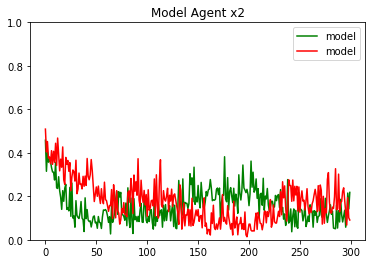

In [2]:
plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Model Agent x2")
plt.show()

In [ ]:
w = 2.5; h = 2.5
ncols = 5
nrows = 4
param_vals = [i*2 for i in range(1, ncols*nrows+1)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 100
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = param, time = t, agent=["model_sig", "model_sig"], memory=[5, 5], behav_control=[5, 5], seed=4)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    ax[ai].set_title('state size = %.3f'%param, color='red')
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x', colors='red')
    ax[ai].tick_params(axis='y', colors='red')

print("\n Sigmoid Model Agents: time: 100, behav_control: 5, memory: 5, varied state size")
plt.show()



 Linear Model Agents: time: 100, behav_control: 5, memory: 5, varied state size


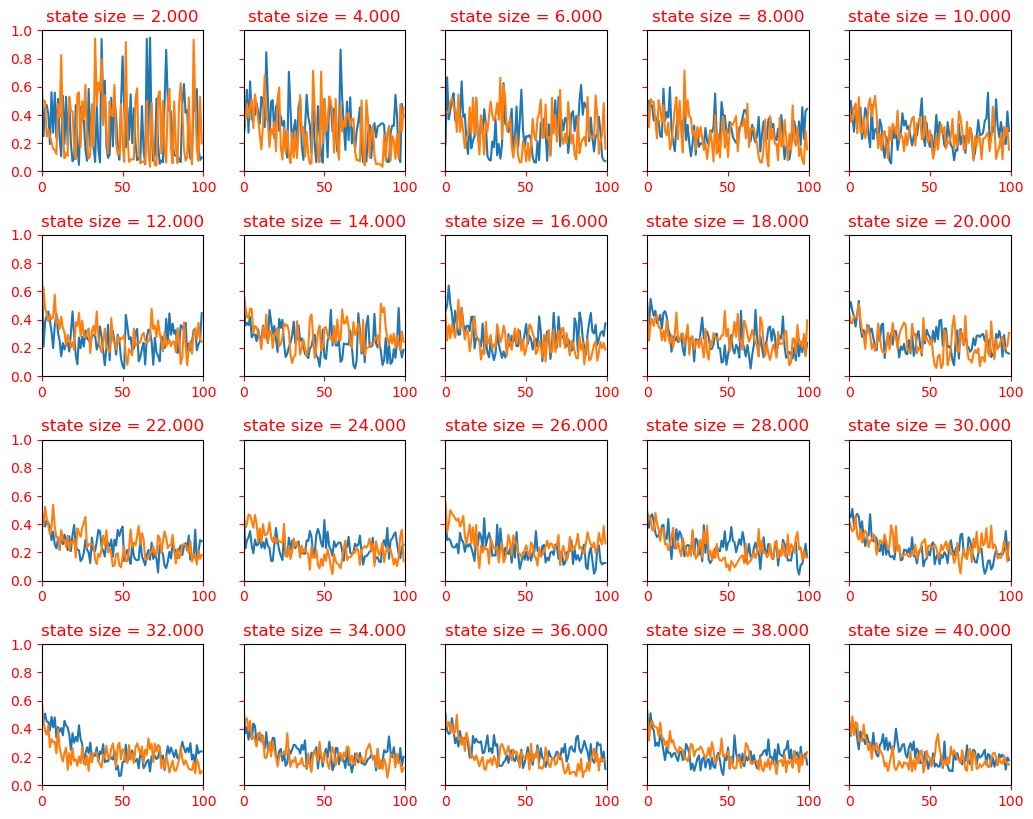

In [ ]:
w = 2.5; h = 2.5
ncols = 5
nrows = 4
param_vals = [i*2 for i in range(1, ncols*nrows+1)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 100
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = param, time = t, agent=["model_lin", "model_lin"], memory=[5, 5], behav_control=[5, 5], seed=4)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    ax[ai].set_title('state size = %.3f'%param, color='red')
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x', colors='red')
    ax[ai].tick_params(axis='y', colors='red')

print("\n Linear Model Agents: time: 100, behav_control: 5, memory: 5, varied state size")
plt.show()


 Sigmoid Model Agents: time: 100, behav_control: 5, state size: 10, memory varied


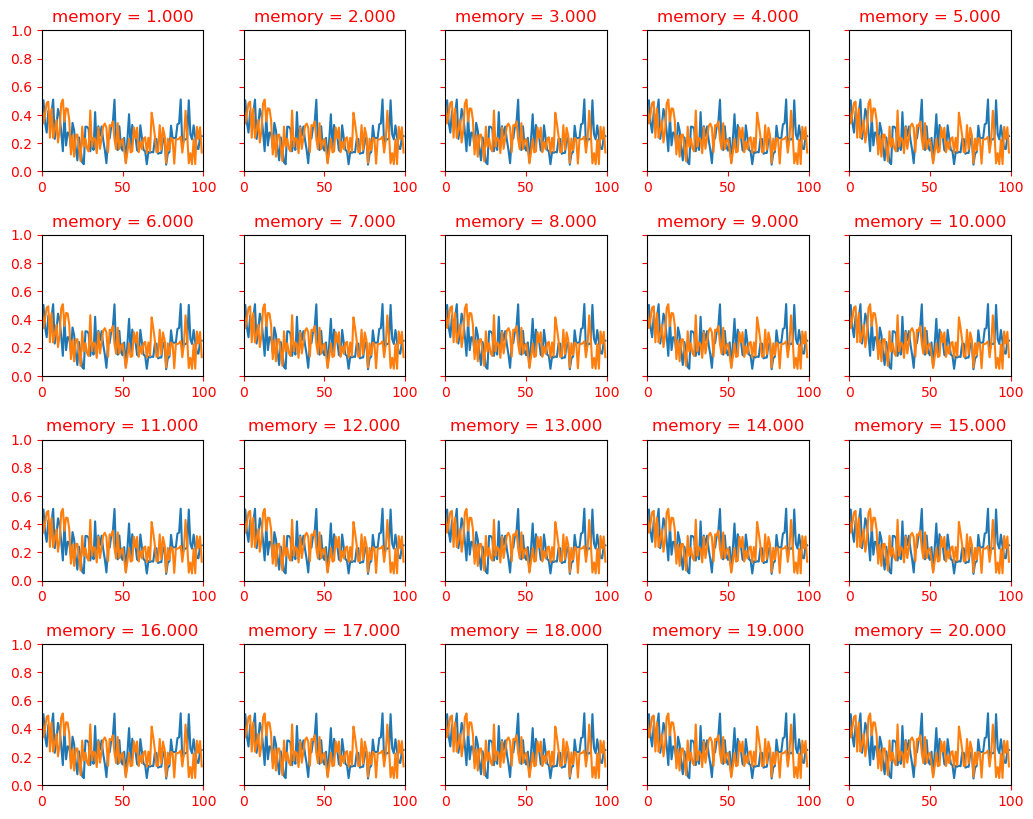

In [ ]:
w = 2.5; h = 2.5
ncols = 5
nrows = 4
param_vals = [i for i in range(1, ncols*nrows+1)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 100
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = 10, time = t, agent=["model_sig", "model_sig"], memory=[param, param], behav_control=[5, 5], seed=4)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    ax[ai].set_title('memory = %.3f'%param, color='red')
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x', colors='red')
    ax[ai].tick_params(axis='y', colors='red')

print("\n Sigmoid Model Agents: time: 100, behav_control: 5, state size: 10, memory varied")
plt.show()


 Sigmoid Model Agents: time: 100, memory: 5, state size: 10, behav_control varied


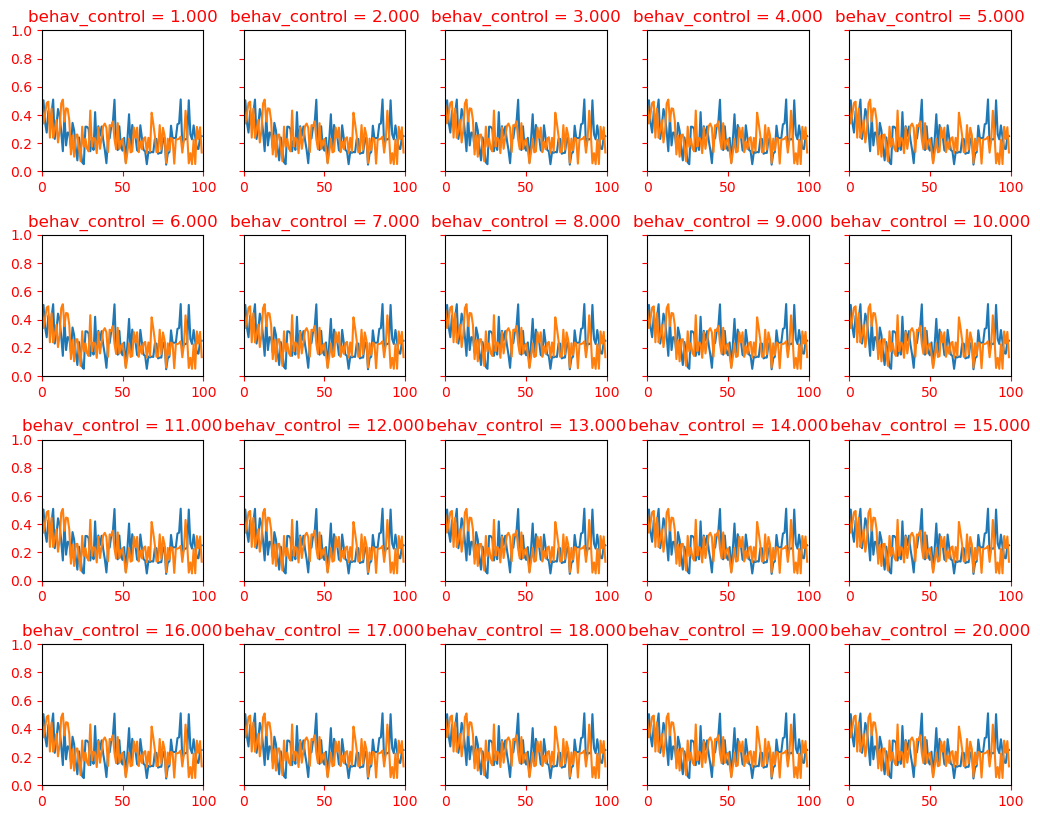

In [ ]:
w = 2.5; h = 2.5
ncols = 5
nrows = 4
param_vals = [i for i in range(1, ncols*nrows+1)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 100
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = 10, time = t, agent=["model_sig", "model_sig"], memory=[5, 5], behav_control=[param, param], seed=4)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    ax[ai].set_title('behav_control = %.3f'%param, color='red')
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x', colors='red')
    ax[ai].tick_params(axis='y', colors='red')

print("\n Sigmoid Model Agents: time: 100, memory: 5, state size: 10, behav_control varied")
plt.show()


 Sigmoid Model Agent error as behav_control varies between 1 and 10


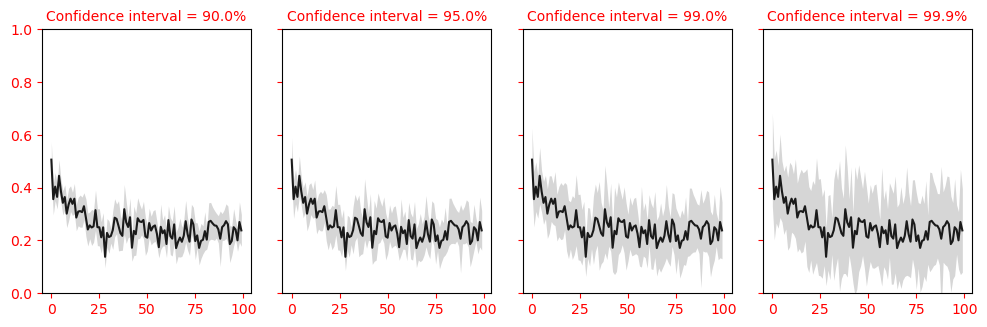

In [ ]:
# run experiments
a = []
t = 100
x = [i for i in range(t)]

for i in range(1,11):
    world = World(state_size = 10, time = t, agent=["model_sig", "model_sig"], memory=[5, 5], behav_control=[i, i])
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    
    # store each instance of fake data in a list
    a.append(costs[0])

# turn that list into an array for convenience
a = np.array(a)


# test out several confidence intervals, just to get the idea
list_of_confidence_intervals = [0.9, 0.95, 0.99, 0.999]


fig, ax = plt.subplots(1,4,figsize=(12,3.5),dpi=100,sharey=True)
plt.subplots_adjust(wspace=0.15)

for ix, conf_int in enumerate(list_of_confidence_intervals):
    ax[ix].set_ylim(0,1)
    ax[ix].plot(x, np.mean(a,axis=0), color='.1')
    upper, lower = sp.t.interval(conf_int,
                                 len(a)-1,
                                 loc=np.mean(a,axis=0),
                                 scale=sp.sem(a,axis=0))
    ax[ix].fill_between(x, upper, lower, alpha=0.4, lw=0, color='.6')
    ax[ix].set_title('Confidence interval = %.1f%%'%(conf_int*100), fontsize=10, color = 'red')
    ax[ix].tick_params(axis='x', colors='red')
    ax[ix].tick_params(axis='y', colors='red')

print("\n Sigmoid Model Agent error as behav_control varies between 1 and 10")
plt.show()

/Users/robert/Documents/Social_AI/Social_AI/agent_with_alt_sigmoid_model.py:199: RuntimeWarning: divide by zero encountered in double_scalars
  out = np.asarray([1 / (1 + ((1/i[j]) - 1) * y[j]) for j in range(len(i))])



 Alternate Sigmoid Model Agents: time: 100, behav_control: 5, memory: 5, varied state size


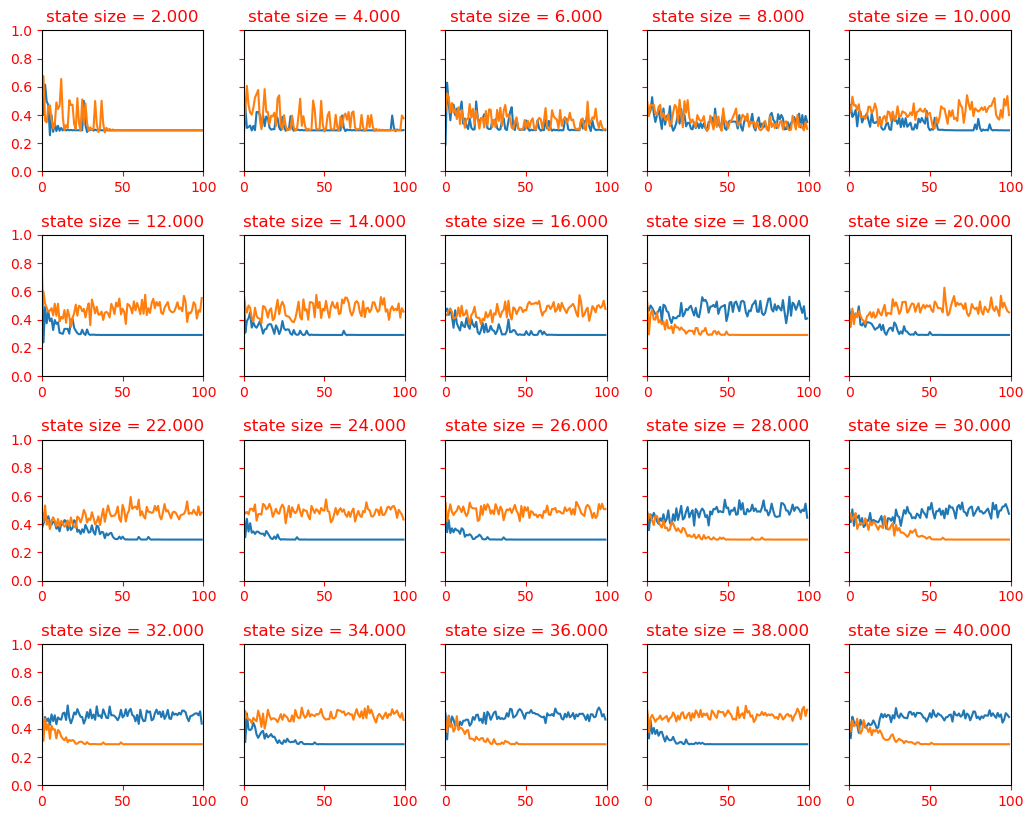

In [ ]:
w = 2.5; h = 2.5
ncols = 5
nrows = 4
param_vals = [i*2 for i in range(1, ncols*nrows+1)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 100
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = param, time = t, agent=["model_alt", "model_alt"], memory=[3, 3], behav_control=[3, 3], seed=4)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    ax[ai].set_title('state size = %.3f'%param, color='red')
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x', colors='red')
    ax[ai].tick_params(axis='y', colors='red')

print("\n Alternate Sigmoid Model Agents: time: 100, behav_control: 5, memory: 5, varied state size")
plt.show()

In [ ]:
# random snippets
priors[:,0][:,0]
errors[:,0][0,:]
preds[:,0][0,1]
for i in range(1,100):
    print(priors[:,1][i,0])
for i in range(1,100):
    print(preds[:,0][i,0])

0.763
0.753
0.981
0.973
0.04
0.016
0.543
0.034
0.657


IndexError: index 10 is out of bounds for axis 0 with size 10